In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import warnings
import json
from matplotlib.patches import Patch

In [ ]:
result_folder = '...'

In [24]:
# Reading the dictionary from the file, results have 2 parts, mean performance and std
with open(result_folder + 'AE_results.pkl', 'rb') as file:
    BAE_results_dict = pickle.load(file)
with open(result_folder + 'DAE_results.pkl', 'rb') as file:
    DAE_results_dict = pickle.load(file)
with open(result_folder + 'CAE_results.pkl', 'rb') as file:
    CAE_results_dict = pickle.load(file)
with open(result_folder + 'SAE_results.pkl', 'rb') as file:
    SAE_results_dict = pickle.load(file)
with open(result_folder + 'RAE_results.pkl', 'rb') as file:
    RAE_results_dict = pickle.load(file)

In [25]:
results_dict = {
    'AE': BAE_results_dict,
    'DAE': DAE_results_dict,
    'CAE': CAE_results_dict,
    'SAE': SAE_results_dict,
    'RAE': RAE_results_dict
}

In [26]:
knn_size_names = ['5', '10', '15', '20']
model_names = ['AE', 'DAE', 'CAE', 'SAE', 'RAE']

In [27]:
with open("./AE_models/col_names.json", "r") as file:
    loaded_col_names = json.load(file)

# Extract lists
feature_space = loaded_col_names["feature_space"]
label_col_names = loaded_col_names["label_col_names"]

In [28]:
n_labels = len(label_col_names)
n_labels

2

Thoughts:
1. Reduce knn size to 4
2. Make up for clustering quality for label 2
3. Best config for knn should be at size = 5 and 20 and seperate them

# Show Statistical Significance

In [29]:
# under each KNN condition we run statistical test
from scipy.stats import ttest_rel

In [30]:
def compute_p_val_table(performance_dict):
    comp_items = list(performance_dict.keys())
    p_val_table = pd.DataFrame("/", index=comp_items, columns=comp_items)
    for i in range(len(comp_items)):
        for j in range(i + 1, len(comp_items)):
            _, p_value = ttest_rel(performance_dict[comp_items[i]], 
                                  performance_dict[comp_items[j]], alternative = 'greater')
    
            p_val_table.iloc[i, j] = f"{p_value:.1e}"
    return p_val_table

In [31]:
def collect_mean_performance_by_knn(results_dict, ith_knn, ith_label, score_name):
    score_this_knn = {'AE': [], 'DAE': [], 'CAE': [], 'SAE': [], 'RAE': []}
    # iterate through configs
    for j in range(len(BAE_results_dict)):
        for model_name in model_names:
            score_this_knn[model_name].append(results_dict[model_name][j]['performance mean'][score_name][ith_knn][ith_label])
    return score_this_knn

In [ ]:
for i in range(n_labels):
    for j in range(len(knn_size_names)):
        score_this_knn = collect_mean_performance_by_knn(results_dict, j, i, 'F1')
        p_val_table_this_knn = compute_p_val_table(score_this_knn)
        p_val_table_this_knn.to_csv(result_folder + 'p_val_tables/%s_knn_%s_general_%s.csv'%(label_col_names[i], knn_size_names[j], 'F1'))

# Plot Performance

In [33]:
model_colors = {
    'AE': 'red',
    'DAE': 'blue',
    'CAE': 'orange',
    'SAE': 'cyan',
    'RAE': 'green',
    'Raw': 'black',
    'PCA': 'grey'
}

In [46]:
def process_and_plot_AE_performance(results_dict, metric_name, plot_raw = False):
    # extract all config performance
    BAE_Euc_perf_label_1, DAE_Euc_perf_label_1, CAE_Euc_perf_label_1, SAE_Euc_perf_label_1, RAE_Euc_perf_label_1, \
           BAE_Euc_perf_label_2, DAE_Euc_perf_label_2, CAE_Euc_perf_label_2, SAE_Euc_perf_label_2, RAE_Euc_perf_label_2 = collect_mean_perf(results_dict, metric_name)
    
    # calculate top config perf
    BAE_Euc_perf_top_mean_label_1, BAE_Euc_perf_top_std_label_1 = calculate_top_perfermance_stats(BAE_Euc_perf_label_1)
    DAE_Euc_perf_top_mean_label_1, DAE_Euc_perf_top_std_label_1 = calculate_top_perfermance_stats(DAE_Euc_perf_label_1)
    CAE_Euc_perf_top_mean_label_1, CAE_Euc_perf_top_std_label_1 = calculate_top_perfermance_stats(CAE_Euc_perf_label_1)
    SAE_Euc_perf_top_mean_label_1, SAE_Euc_perf_top_std_label_1 = calculate_top_perfermance_stats(SAE_Euc_perf_label_1)
    RAE_Euc_perf_top_mean_label_1, RAE_Euc_perf_top_std_label_1 = calculate_top_perfermance_stats(RAE_Euc_perf_label_1)
    
    BAE_Euc_perf_top_mean_label_2, BAE_Euc_perf_top_std_label_2 = calculate_top_perfermance_stats(BAE_Euc_perf_label_2)
    DAE_Euc_perf_top_mean_label_2, DAE_Euc_perf_top_std_label_2 = calculate_top_perfermance_stats(DAE_Euc_perf_label_2)
    CAE_Euc_perf_top_mean_label_2, CAE_Euc_perf_top_std_label_2 = calculate_top_perfermance_stats(CAE_Euc_perf_label_2)
    SAE_Euc_perf_top_mean_label_2, SAE_Euc_perf_top_std_label_2 = calculate_top_perfermance_stats(SAE_Euc_perf_label_2)
    RAE_Euc_perf_top_mean_label_2, RAE_Euc_perf_top_std_label_2 = calculate_top_perfermance_stats(RAE_Euc_perf_label_2)
    
    raw_performance = pd.read_csv(result_folder + 'raw_data_performance.csv', index_col = 0)
    raw_performance_PCA = pd.read_csv(result_folder + 'raw_data_performance_PCA.csv', index_col = 0)
    raw_perf_mean_label_1 = raw_performance.loc[:, '%s_mean_0'%metric_name]
    raw_perf_mean_label_2 = raw_performance.loc[:, '%s_mean_1'%metric_name]
    raw_perf_mean_label_1_PCA = raw_performance_PCA.loc[:, '%s_mean_0'%metric_name]
    raw_perf_mean_label_2_PCA = raw_performance_PCA.loc[:, '%s_mean_1'%metric_name]
    
    
    fig, ax = plt.subplots(2, 2, figsize=(18, 12))
    plot_cluster_boxplot(ax[0, 0], BAE_Euc_perf_label_1, DAE_Euc_perf_label_1, CAE_Euc_perf_label_1, SAE_Euc_perf_label_1, RAE_Euc_perf_label_1, 'AKI Onset', metric_name)
    plot_cluster_boxplot(ax[0, 1], BAE_Euc_perf_label_2, DAE_Euc_perf_label_2, CAE_Euc_perf_label_2, SAE_Euc_perf_label_2, RAE_Euc_perf_label_2, '1-year Mortality', metric_name)
    plot_top_config_perf_linebar(ax[1, 0], BAE_Euc_perf_top_mean_label_1, BAE_Euc_perf_top_std_label_1, DAE_Euc_perf_top_mean_label_1, DAE_Euc_perf_top_std_label_1, 
                                CAE_Euc_perf_top_mean_label_1, CAE_Euc_perf_top_std_label_1, SAE_Euc_perf_top_mean_label_1, SAE_Euc_perf_top_std_label_1, 
                                RAE_Euc_perf_top_mean_label_1, RAE_Euc_perf_top_std_label_1, raw_perf_mean_label_1, raw_perf_mean_label_1_PCA, 'AKI Onset', metric_name, plot_raw)
    plot_top_config_perf_linebar(ax[1, 1], BAE_Euc_perf_top_mean_label_2, BAE_Euc_perf_top_std_label_2, DAE_Euc_perf_top_mean_label_2, DAE_Euc_perf_top_std_label_2, 
                                CAE_Euc_perf_top_mean_label_2, CAE_Euc_perf_top_std_label_2, SAE_Euc_perf_top_mean_label_2, SAE_Euc_perf_top_std_label_2, 
                                RAE_Euc_perf_top_mean_label_2, RAE_Euc_perf_top_std_label_2, raw_perf_mean_label_2, raw_perf_mean_label_2_PCA, '1-year Mortality', metric_name, plot_raw)

    # Adding labels to each subplot
    labels = ['a', 'b', 'c', 'd', 'e', 'f']
    positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

    for label, (i, j) in zip(labels, positions):
        ax[i, j].text(-0.1, 1.1, label, transform=ax[i, j].transAxes,
                    fontsize=25, fontweight='bold', va='top', ha='right')
    plt.tight_layout()
    plt.savefig(result_folder + 'Figures/KUMC_perf_%s.tiff'%metric_name, format='tiff', dpi = 300)
    plt.show()

In [47]:
def collect_mean_perf(results_dict, metric_name):
    # extract all config performance
    BAE_Euc_perf_label_1 = collect_mean_performance_by_model('AE', results_dict, 0, metric_name)
    DAE_Euc_perf_label_1  = collect_mean_performance_by_model('DAE', results_dict, 0, metric_name)
    CAE_Euc_perf_label_1 = collect_mean_performance_by_model('CAE', results_dict, 0, metric_name)
    SAE_Euc_perf_label_1 = collect_mean_performance_by_model('SAE', results_dict, 0, metric_name)
    RAE_Euc_perf_label_1 = collect_mean_performance_by_model('RAE', results_dict, 0, metric_name)
    
    BAE_Euc_perf_label_2 = collect_mean_performance_by_model('AE', results_dict, 1, metric_name)
    DAE_Euc_perf_label_2  = collect_mean_performance_by_model('DAE', results_dict, 1, metric_name)
    CAE_Euc_perf_label_2 = collect_mean_performance_by_model('CAE', results_dict, 1, metric_name)
    SAE_Euc_perf_label_2 = collect_mean_performance_by_model('SAE', results_dict, 1, metric_name)
    RAE_Euc_perf_label_2 = collect_mean_performance_by_model('RAE', results_dict, 1, metric_name)
    
    return BAE_Euc_perf_label_1, DAE_Euc_perf_label_1, CAE_Euc_perf_label_1, SAE_Euc_perf_label_1, RAE_Euc_perf_label_1, \
           BAE_Euc_perf_label_2, DAE_Euc_perf_label_2, CAE_Euc_perf_label_2, SAE_Euc_perf_label_2, RAE_Euc_perf_label_2
    

In [48]:
def collect_mean_performance_by_model(model_name, results_dict, ith_label, score_name):
    model_performance = results_dict[model_name]

    scores = []
    
    for idx, perf in model_performance.items():
        scores.append(np.array(perf['performance mean'][score_name])[:, ith_label])
        
    scores_df = pd.DataFrame(np.array(scores), columns = knn_size_names)
    
    return scores_df

In [49]:
def calculate_top_perfermance_stats(df, top_idx = 5):
    means = []
    stds = []
    for column in df.columns:
        sorted_col = df[column].sort_values(ascending = False)
        top_perf = sorted_col.iloc[:top_idx]
        means.append(top_perf.mean())
        stds.append(top_perf.std())
    return means, stds

# Overall Performance

In [50]:
def plot_cluster_boxplot(ax, BAE_results, DAE_results, CAE_results, SAE_results, RAE_results, pred_target, metric_name):
    combined_data = pd.concat([BAE_results, DAE_results, CAE_results, SAE_results, RAE_results], 
                              axis=0, keys=model_names)

    plot_data = []
    colors = []
    labels = []

    for col in BAE_results.columns:
        plot_data.append(BAE_results[col].values)
        colors.append(model_colors['AE'])
        plot_data.append(DAE_results[col].values)
        colors.append(model_colors['DAE'])
        plot_data.append(CAE_results[col].values)
        colors.append(model_colors['CAE'])
        plot_data.append(SAE_results[col].values)
        colors.append(model_colors['SAE'])
        plot_data.append(RAE_results[col].values)
        colors.append(model_colors['RAE'])
        labels.extend([f'{col} AE', f'{col} DAE', f'{col} CAE', f'{col} SAE', f'{col} RAE'])

    positions = []
    for i in range(len(BAE_results.columns)):
        positions.extend([i*7 + j for j in range(1, 6)])

    boxprops = dict(patch_artist=True) 

    bp = ax.boxplot(plot_data, positions=positions, widths=0.5, patch_artist=True)

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    ax.set_xticks([i*7 + 2.5 for i in range(len(BAE_results.columns))])
    

    ax.set_xticklabels(knn_size_names, fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    title = '%s of All Configurations for Predicting %s'%(metric_name, pred_target)

    ax.set_title(title, fontsize=15)
    ax.set_xlabel('k', fontsize=15)
    ax.set_ylabel(metric_name, fontsize=15)

    legend_elements = [Patch(facecolor=model_colors['AE'], edgecolor='black', label='AE'),
                       Patch(facecolor=model_colors['DAE'], edgecolor='black', label='DAE'),
                       Patch(facecolor=model_colors['CAE'], edgecolor='black', label='CAE'),
                       Patch(facecolor=model_colors['SAE'], edgecolor='black', label='SAE'),
                       Patch(facecolor=model_colors['RAE'], edgecolor='black', label='RAE')]

    ax.legend(handles=legend_elements, title='Models', fontsize=12, title_fontsize=12, loc = 'upper left')

In [51]:
def plot_top_config_perf_linebar(ax, BAE_mean, BAE_std, DAE_mean, DAE_std, CAE_mean, CAE_std, 
                                 SAE_mean, SAE_std, RAE_mean, RAE_std, raw_mean, PCA_mean, pred_target, metric_name, plot_raw):
        if plot_raw:
                ax.plot(range(len(raw_mean)), raw_mean, linestyle='--', marker='o',
                        label = 'Raw', color = model_colors['Raw'])
                ax.plot(range(len(PCA_mean)), PCA_mean, linestyle='--', marker='o',
                        label = 'PCA', color = model_colors['PCA'])
        ax.errorbar(range(len(BAE_mean)), BAE_mean, yerr=BAE_std, fmt='-o', capsize=5, 
                        label = 'AE', color = model_colors['AE'])
        ax.errorbar(range(len(DAE_mean)), DAE_mean, yerr=DAE_std, fmt='-o', capsize=5, 
                        label = 'DAE', color = model_colors['DAE'])
        ax.errorbar(range(len(CAE_mean)), CAE_mean, yerr=CAE_std, fmt='-o', capsize=5, 
                        label = 'CAE', color = model_colors['CAE'])
        ax.errorbar(range(len(SAE_mean)), SAE_mean, yerr=SAE_std, fmt='-o', capsize=5, 
                        label = 'SAE', color = model_colors['SAE'])
        ax.errorbar(range(len(RAE_mean)), RAE_mean, yerr=RAE_std, fmt='-o', capsize=5, 
                        label = 'RAE', color = model_colors['RAE'])
    


        ax.set_xlabel('k', fontsize=15)
        ax.set_ylabel(metric_name, fontsize=15)
        ax.set_xticks([i for i in range(len(BAE_mean))])
        ax.set_xticklabels(knn_size_names, fontsize=15)
        
        title = '%s of Top 5 Configurations for Predicting %s'%(metric_name, pred_target)

        
        ax.set_title(title, fontsize=15)
        ax.tick_params(axis='y', labelsize=15)
        
        
        
        legend_elements = [Patch(facecolor=model_colors['Raw'], edgecolor='black', label='Raw'),
                        Patch(facecolor=model_colors['PCA'], edgecolor='black', label='PCA'),
                        Patch(facecolor=model_colors['AE'], edgecolor='black', label='AE'),
                        Patch(facecolor=model_colors['DAE'], edgecolor='black', label='DAE'),
                        Patch(facecolor=model_colors['CAE'], edgecolor='black', label='CAE'),
                        Patch(facecolor=model_colors['SAE'], edgecolor='black', label='SAE'),
                        Patch(facecolor=model_colors['RAE'], edgecolor='black', label='RAE')]
        if not plot_raw:
                legend_elements = legend_elements[2:]
                
        ax.legend(handles=legend_elements, title='Models', fontsize=12, title_fontsize=12, loc = 'upper left')

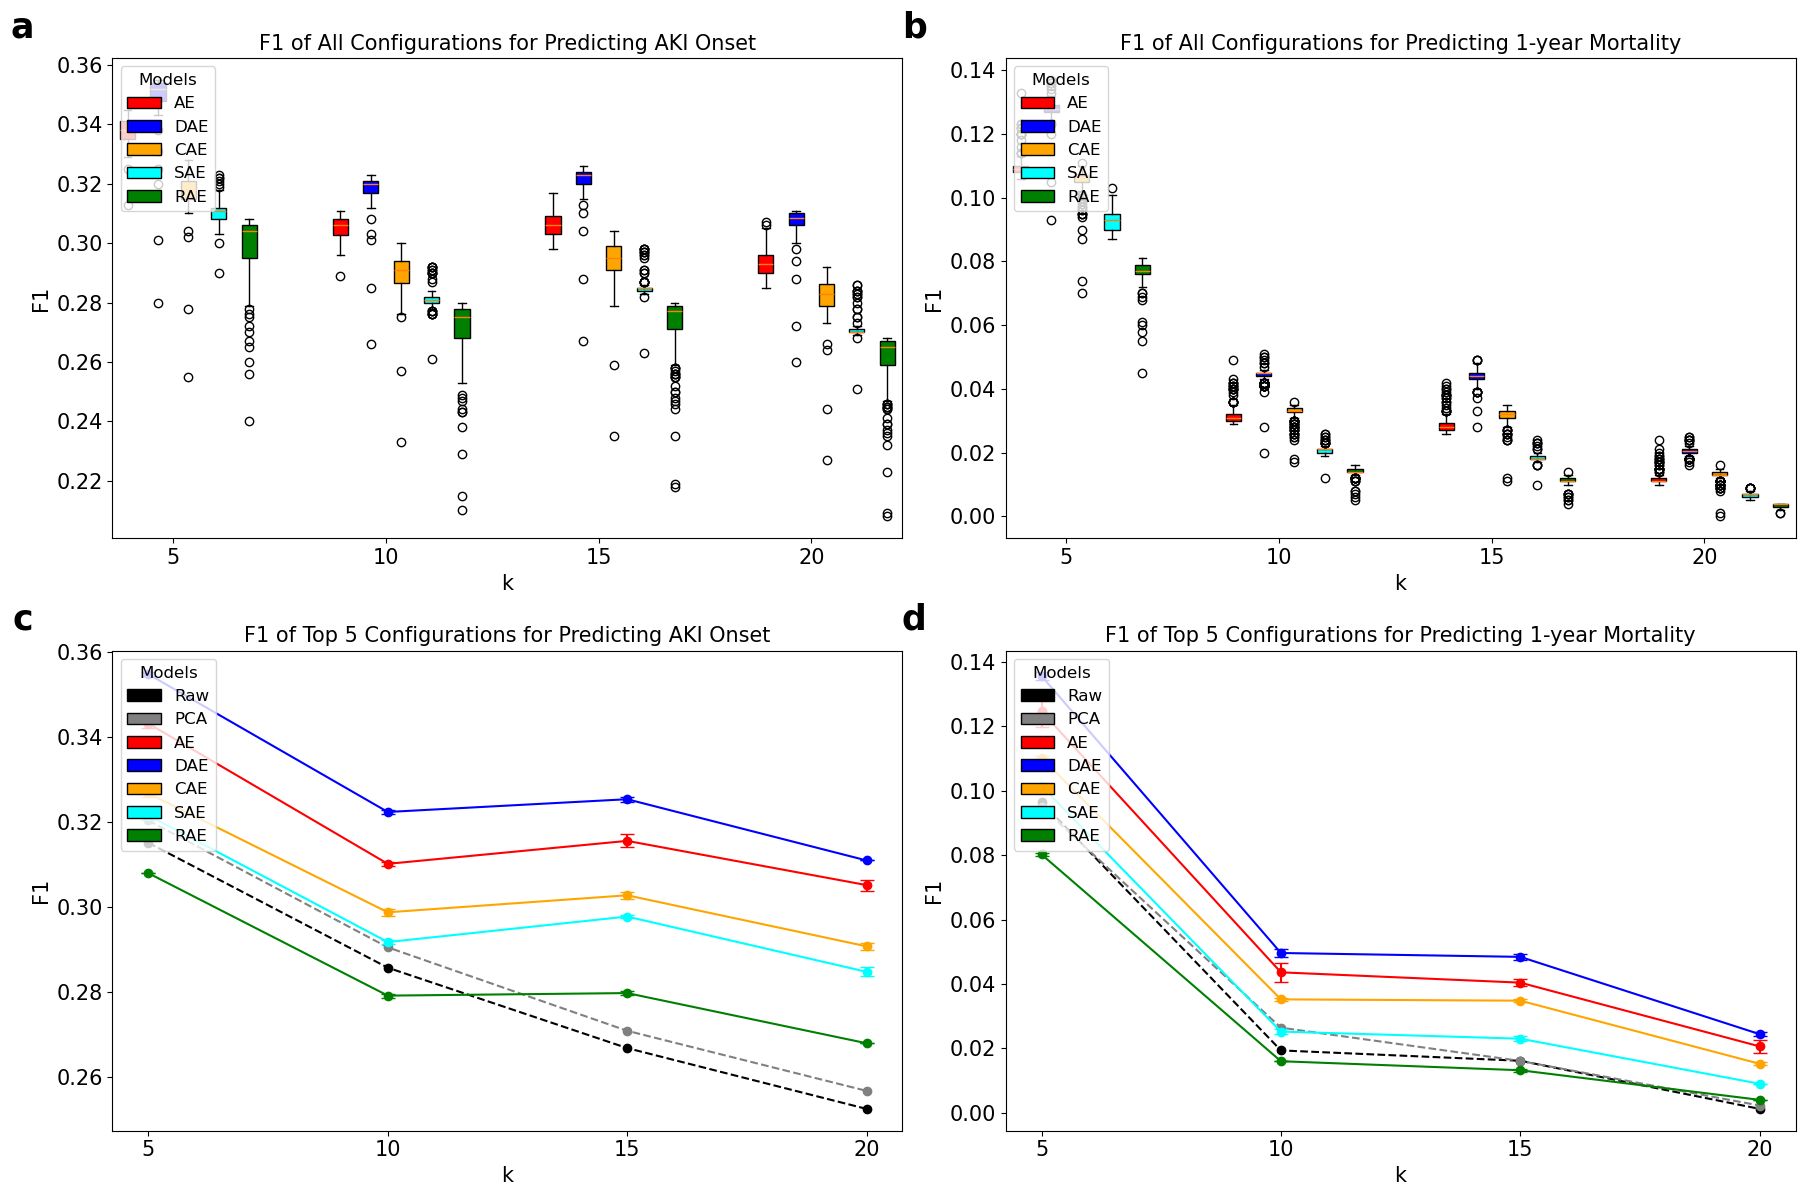

In [55]:
process_and_plot_AE_performance(results_dict, "F1", True)

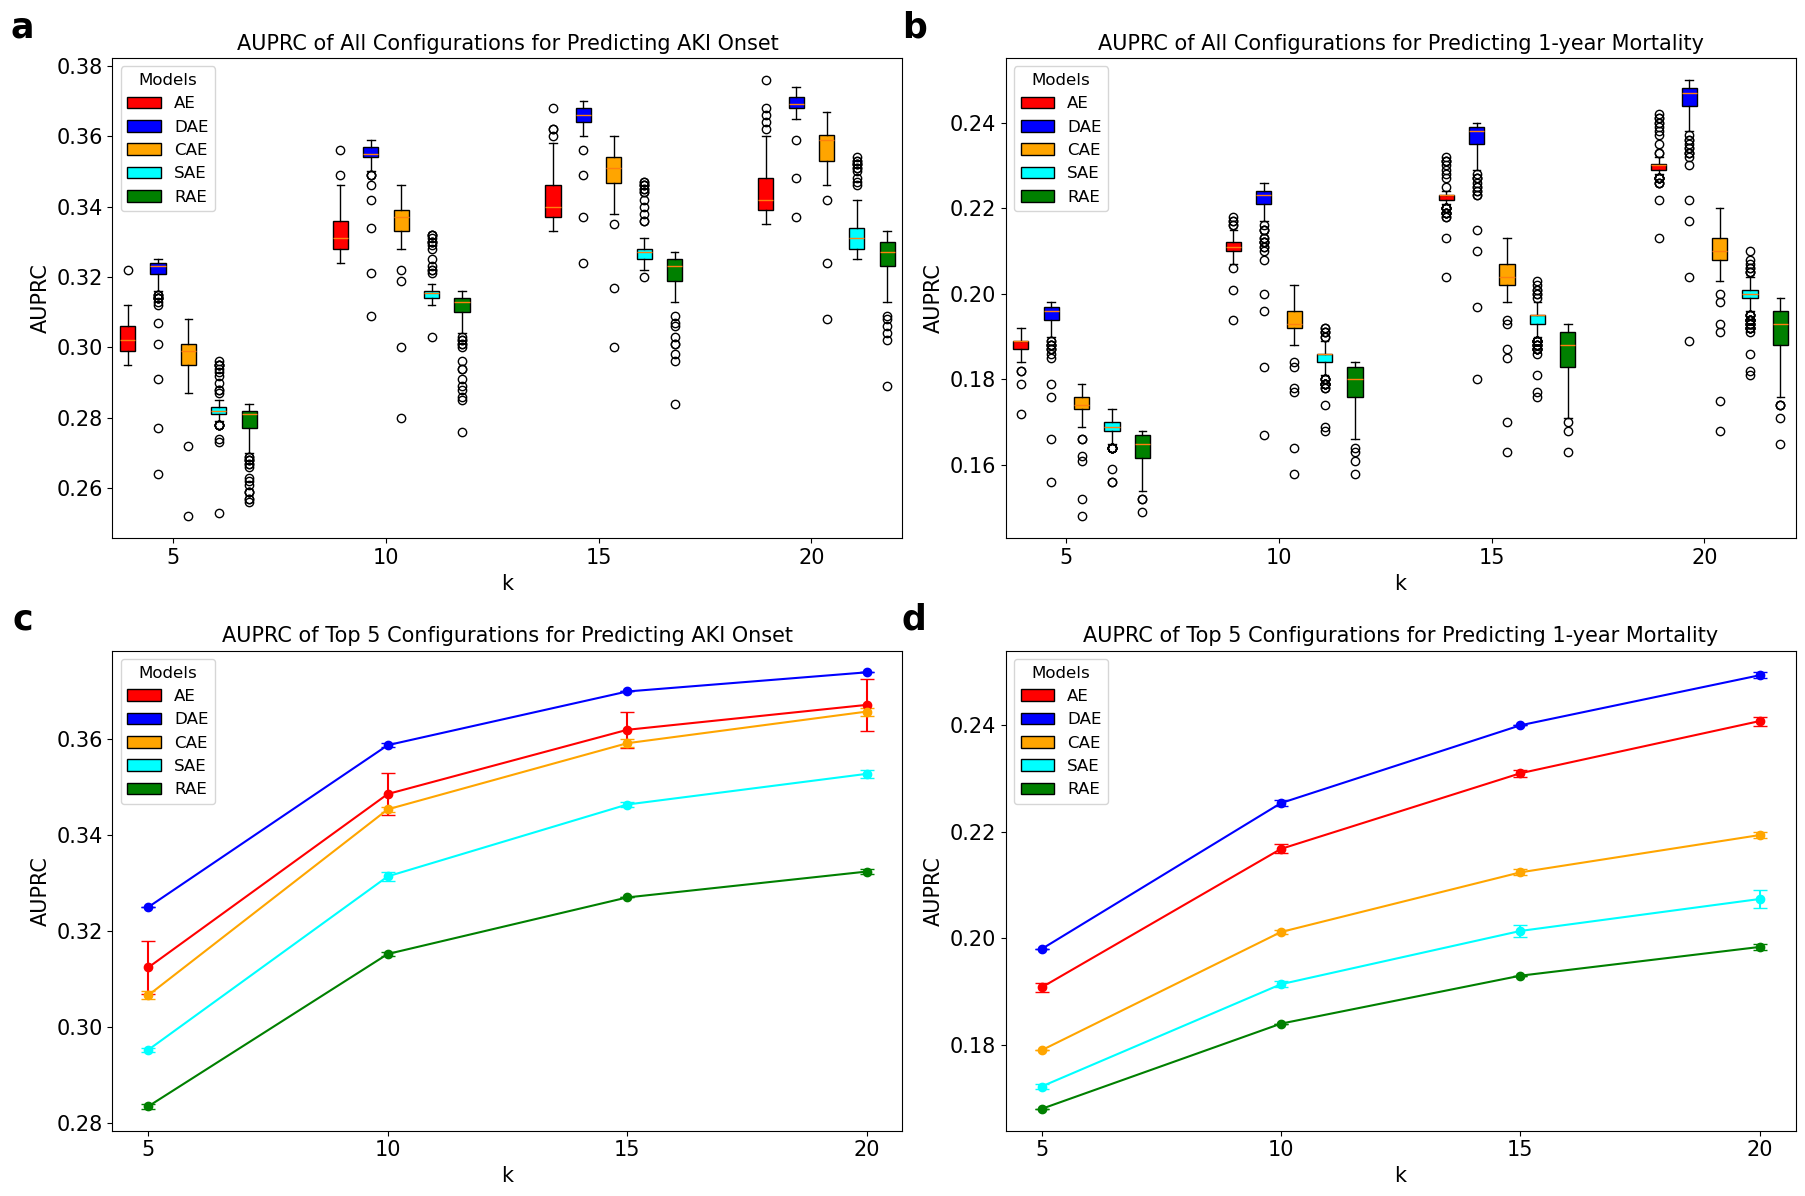

In [56]:
process_and_plot_AE_performance(results_dict, "AUPRC")

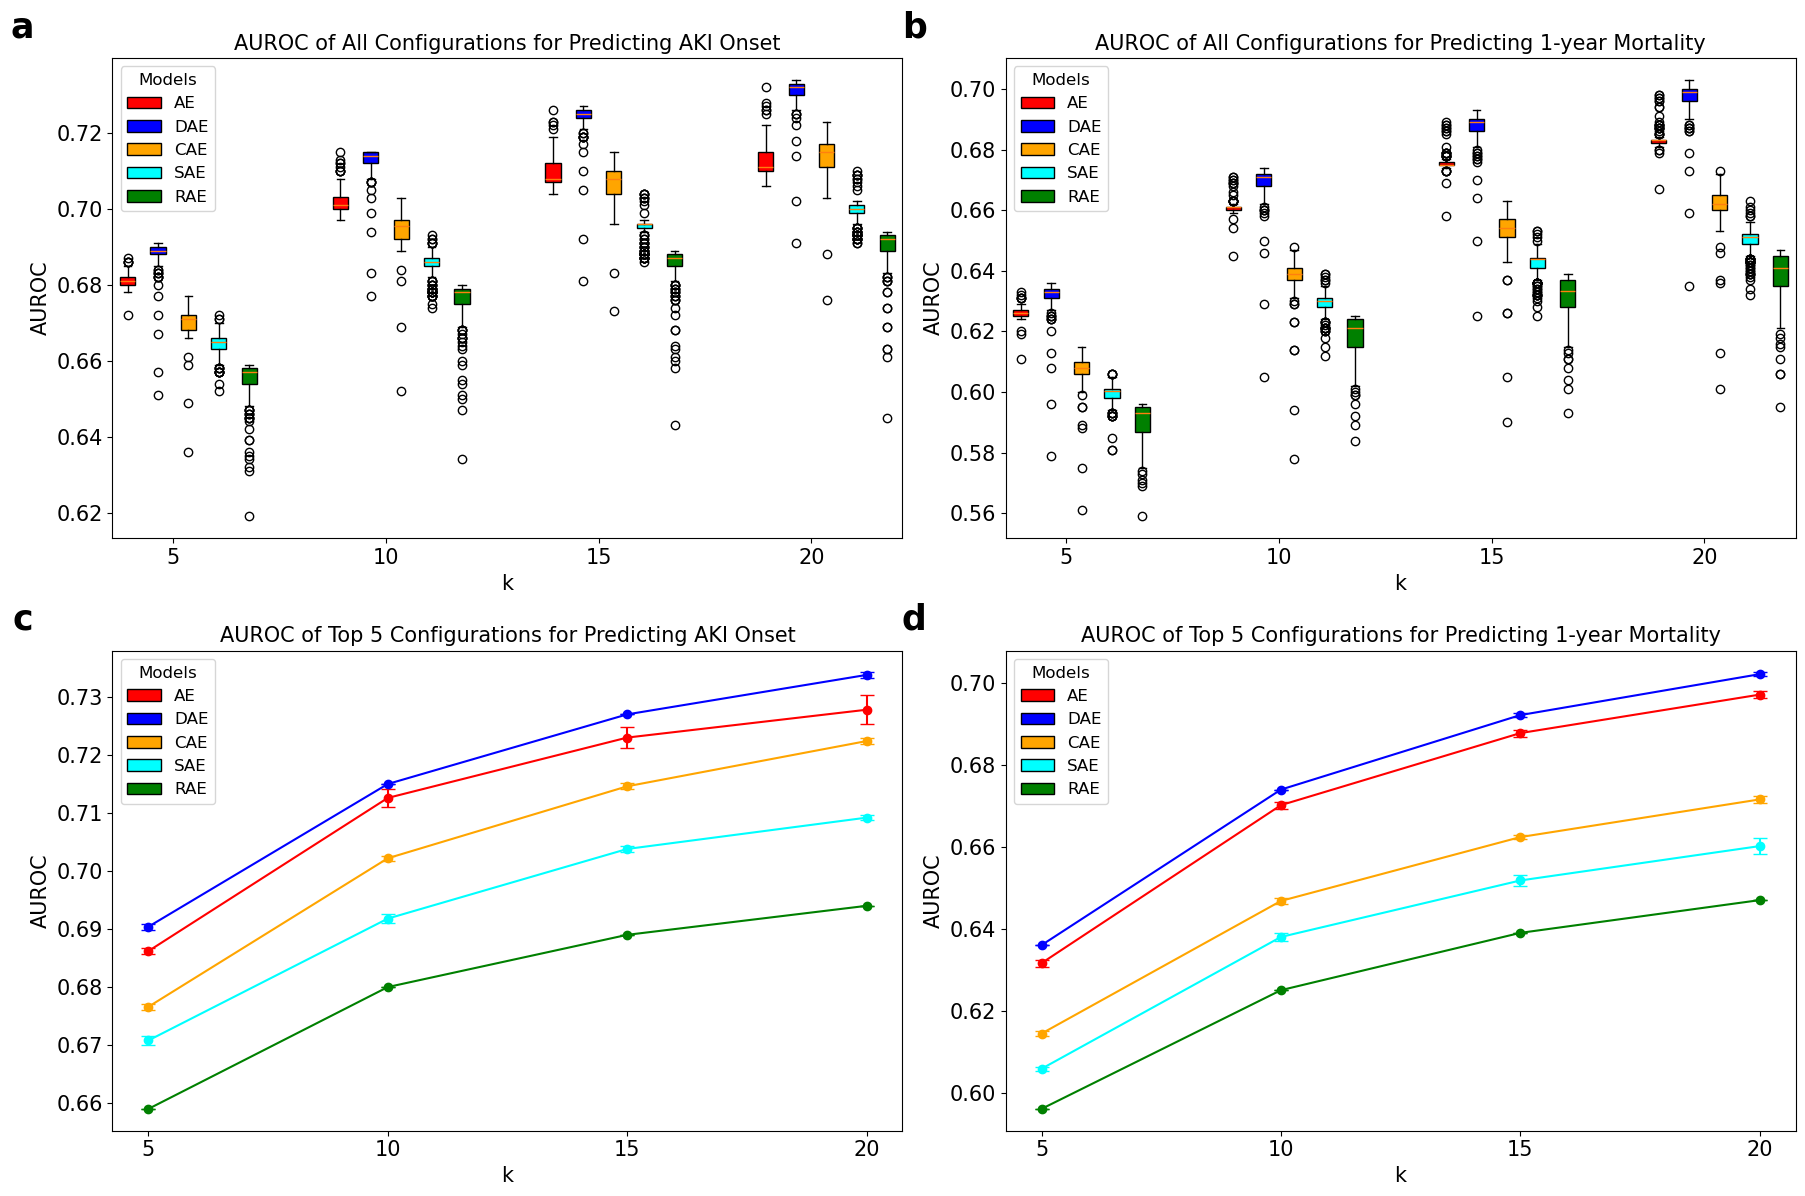

In [57]:
process_and_plot_AE_performance(results_dict, "AUROC")

# Hyperparameter Analysis

In [79]:
def process_and_plot_config_perf(results_dict, metric_name):
   BAE_Euc_perf_label_1, DAE_Euc_perf_label_1, CAE_Euc_perf_label_1, SAE_Euc_perf_label_1, RAE_Euc_perf_label_1, _, _, _, _, _ = collect_mean_perf(results_dict, metric_name)
        
   # Reading the dictionary from the file
   with open('./configurations.pkl', 'rb') as file:
      config_space = pickle.load(file)
            
   lrs, optimizers, latents, activations = get_unique_hyperparameters(config_space)
   
   
   lr_idx_dict = get_hp_idx_set(config_space, 'learning_rate', lrs)
   opt_idx_dict = get_hp_idx_set(config_space, 'optimizer', optimizers)
   lat_idx_dict = get_hp_idx_set(config_space, 'latent', latents)
   act_idx_dict = get_hp_idx_set(config_space, 'activation', activations)
   
   
   # organize performance for label 1
   BAE_lr_performance_label_1 = organize_hp_performance(BAE_Euc_perf_label_1, lr_idx_dict)
   DAE_lr_performance_label_1 = organize_hp_performance(DAE_Euc_perf_label_1, lr_idx_dict)
   CAE_lr_performance_label_1 = organize_hp_performance(CAE_Euc_perf_label_1, lr_idx_dict)
   SAE_lr_performance_label_1 = organize_hp_performance(SAE_Euc_perf_label_1, lr_idx_dict)
   RAE_lr_performance_label_1 = organize_hp_performance(RAE_Euc_perf_label_1, lr_idx_dict)

   BAE_opt_performance_label_1 = organize_hp_performance(BAE_Euc_perf_label_1, opt_idx_dict)
   DAE_opt_performance_label_1 = organize_hp_performance(DAE_Euc_perf_label_1, opt_idx_dict)
   CAE_opt_performance_label_1 = organize_hp_performance(CAE_Euc_perf_label_1, opt_idx_dict)
   SAE_opt_performance_label_1 = organize_hp_performance(SAE_Euc_perf_label_1, opt_idx_dict)
   RAE_opt_performance_label_1 = organize_hp_performance(RAE_Euc_perf_label_1, opt_idx_dict)

   BAE_lat_performance_label_1 = organize_hp_performance(BAE_Euc_perf_label_1, lat_idx_dict)
   DAE_lat_performance_label_1 = organize_hp_performance(DAE_Euc_perf_label_1, lat_idx_dict)
   CAE_lat_performance_label_1 = organize_hp_performance(CAE_Euc_perf_label_1, lat_idx_dict)
   SAE_lat_performance_label_1 = organize_hp_performance(SAE_Euc_perf_label_1, lat_idx_dict)
   RAE_lat_performance_label_1 = organize_hp_performance(RAE_Euc_perf_label_1, lat_idx_dict)

   BAE_act_performance_label_1 = organize_hp_performance(BAE_Euc_perf_label_1, act_idx_dict)
   DAE_act_performance_label_1 = organize_hp_performance(DAE_Euc_perf_label_1, act_idx_dict)
   CAE_act_performance_label_1 = organize_hp_performance(CAE_Euc_perf_label_1, act_idx_dict)
   SAE_act_performance_label_1 = organize_hp_performance(SAE_Euc_perf_label_1, act_idx_dict)
   RAE_act_performance_label_1 = organize_hp_performance(RAE_Euc_perf_label_1, act_idx_dict)
   
   
   fig, ax = plt.subplots(2, 2, figsize=(18, 12))
   plot_hp_performance(ax[0, 0], BAE_lr_performance_label_1, DAE_lr_performance_label_1, CAE_lr_performance_label_1,
                     SAE_lr_performance_label_1, RAE_lr_performance_label_1, 'Learning rates')
   plot_hp_performance(ax[0, 1], BAE_opt_performance_label_1, DAE_opt_performance_label_1, CAE_opt_performance_label_1,
                     SAE_opt_performance_label_1, RAE_opt_performance_label_1, 'Optimizers')
   plot_hp_performance(ax[1, 0], BAE_lat_performance_label_1, DAE_lat_performance_label_1, CAE_lat_performance_label_1,
                     SAE_lat_performance_label_1, RAE_lat_performance_label_1, 'Latent dimensions')
   plot_hp_performance(ax[1, 1], BAE_act_performance_label_1, DAE_act_performance_label_1, CAE_act_performance_label_1,
                     SAE_act_performance_label_1, RAE_act_performance_label_1, 'Activations')

   # Adding labels to each subplot
   labels = ['a', 'b', 'c', 'd']
   positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

   for label, i in zip(labels, positions):
      ax[i].text(-0.1, 1.1, label, transform=ax[i].transAxes,
                     fontsize=25, fontweight='bold', va='top', ha='right')

   plt.tight_layout()
   plt.savefig(result_folder + 'Figures/KUMC_hyperparameters_at_20_%s.tiff'%metric_name, format='tiff', dpi = 300)
   plt.show()
   
   

In [80]:
def get_unique_hyperparameters(config_space):
    # get unique hyperparameters
    lrs = []
    optimizers = []
    latents = []
    activations = []

    for config in config_space.values():
        lr = config['learning_rate']
        opt = config['optimizer']
        lat = config['latent']
        activation = config['activation']
        if lr not in lrs:
            lrs.append(lr)
        if opt not in optimizers:
            optimizers.append(opt)
        if lat not in latents:
            latents.append(lat)
        if activation not in activations:
            activations.append(activation)
    return lrs, optimizers, latents, activations

In [81]:
def get_hp_idx_set(config_space, hp_name, hp_space):
    hp_idx_dict = dict()
    for hp in hp_space:
        hp_idx_dict[hp] = []
        for idx, config in config_space.items():
            if config[hp_name] == hp:
                hp_idx_dict[hp].append(idx)
    return hp_idx_dict

In [82]:
def organize_hp_performance(AE_results, hp_idx_dict):
    KNN_results = AE_results.loc[:, '20']
    hp_results_cluster = []
    for hp, idx_set in hp_idx_dict.items():
        hp_results_cluster.append(KNN_results[idx_set].values)
    
    hp_results_cluster_dict = dict()
    
    for i, hp in enumerate(list(hp_idx_dict.keys())):
        hp_results_cluster_dict[hp] = hp_results_cluster[i]
        
    return hp_results_cluster_dict

In [83]:
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

def plot_hp_performance(ax, BAE_dict, DAE_dict, CAE_dict, SAE_dict, RAE_dict, hp_name):
    BAE_df = pd.DataFrame(BAE_dict)
    DAE_df = pd.DataFrame(DAE_dict)
    CAE_df = pd.DataFrame(CAE_dict)
    SAE_df = pd.DataFrame(SAE_dict)
    RAE_df = pd.DataFrame(RAE_dict)
    
    BAE_df['Cluster'] = 'AE'
    DAE_df['Cluster'] = 'DAE'
    CAE_df['Cluster'] = 'CAE'
    SAE_df['Cluster'] = 'SAE'
    RAE_df['Cluster'] = 'RAE'
    

    df_all = pd.concat([BAE_df, DAE_df, CAE_df, SAE_df, RAE_df])

    df_melted = df_all.melt(id_vars='Cluster', var_name=hp_name, value_name='F1')
    
    
    palette = sns.color_palette(n_colors=len(df_all.columns) - 1)
    sns.boxplot(x='Cluster', y='F1', hue=hp_name, data=df_melted, ax = ax, palette=palette)

    ax.set_title(hp_name.title(), fontsize = 20)
    ax.set_xlabel('Models', fontsize = 15)
    ax.set_ylabel('F1', fontsize = 15)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    # format legend
    handles, labels = ax.get_legend_handles_labels()

    formatted_labels = []
    for label in labels:
        try:
            formatted_label = f'{float(label):.5f}'.rstrip('0').rstrip('.')
        except ValueError:
            formatted_label = label
        formatted_labels.append(formatted_label)
    ax.legend(handles, formatted_labels, title=hp_name, fontsize=12, title_fontsize=12, loc = 'lower left')

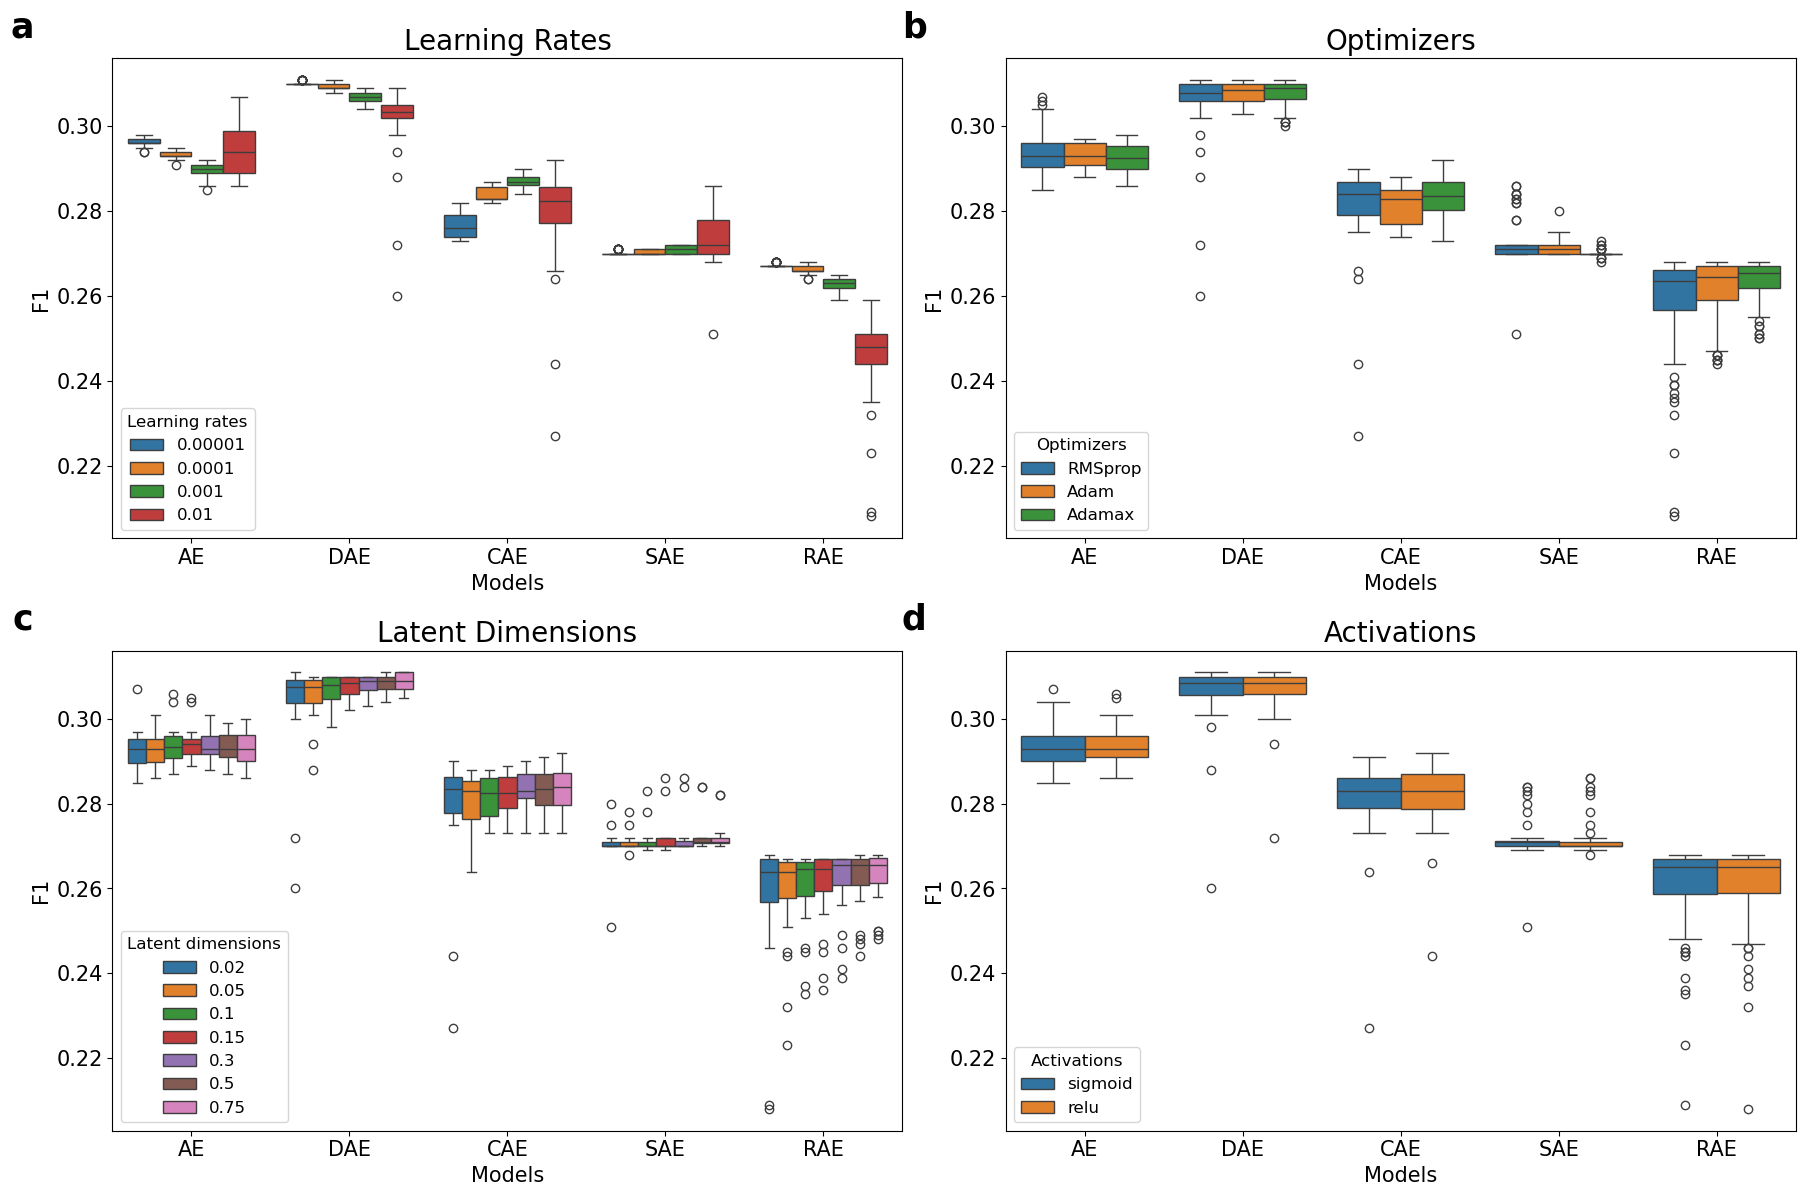

In [84]:
process_and_plot_config_perf(results_dict, "F1")

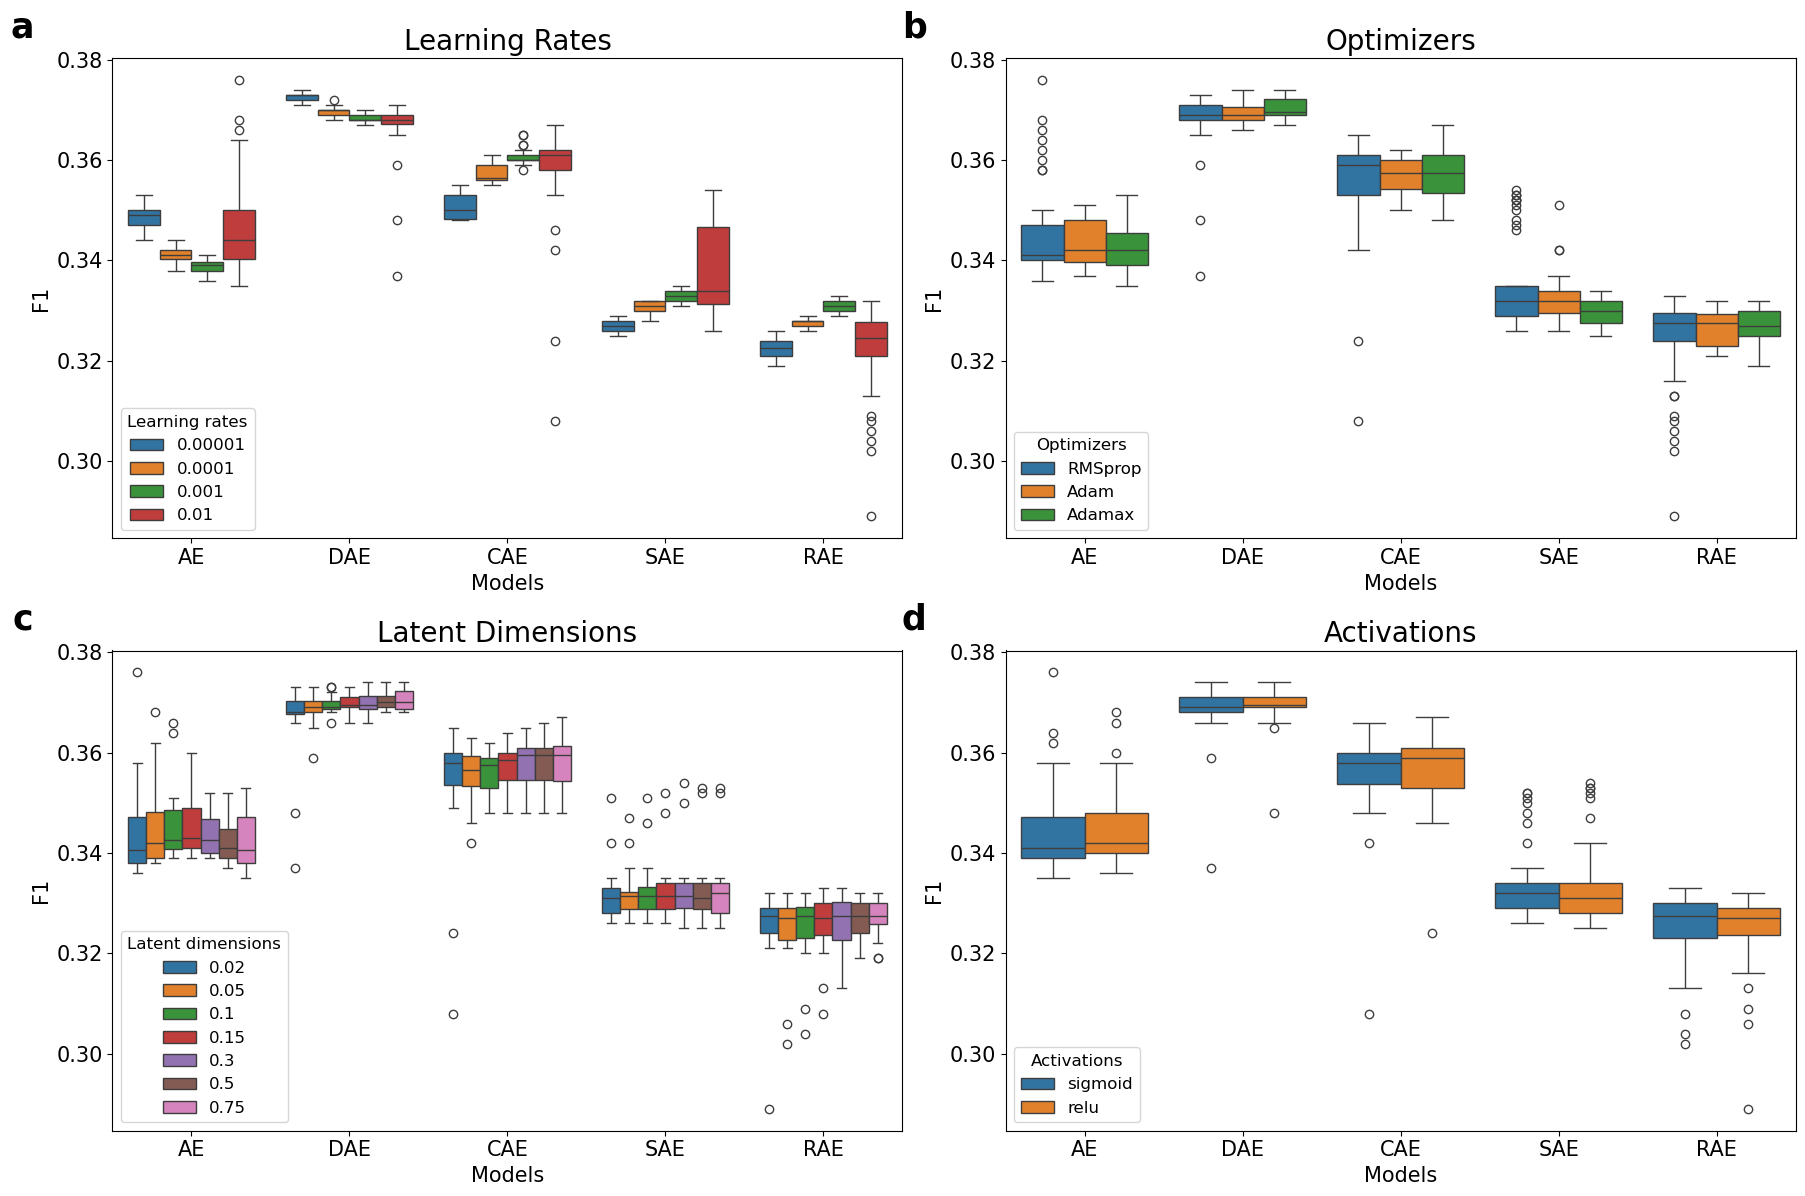

In [85]:
process_and_plot_config_perf(results_dict, "AUPRC")

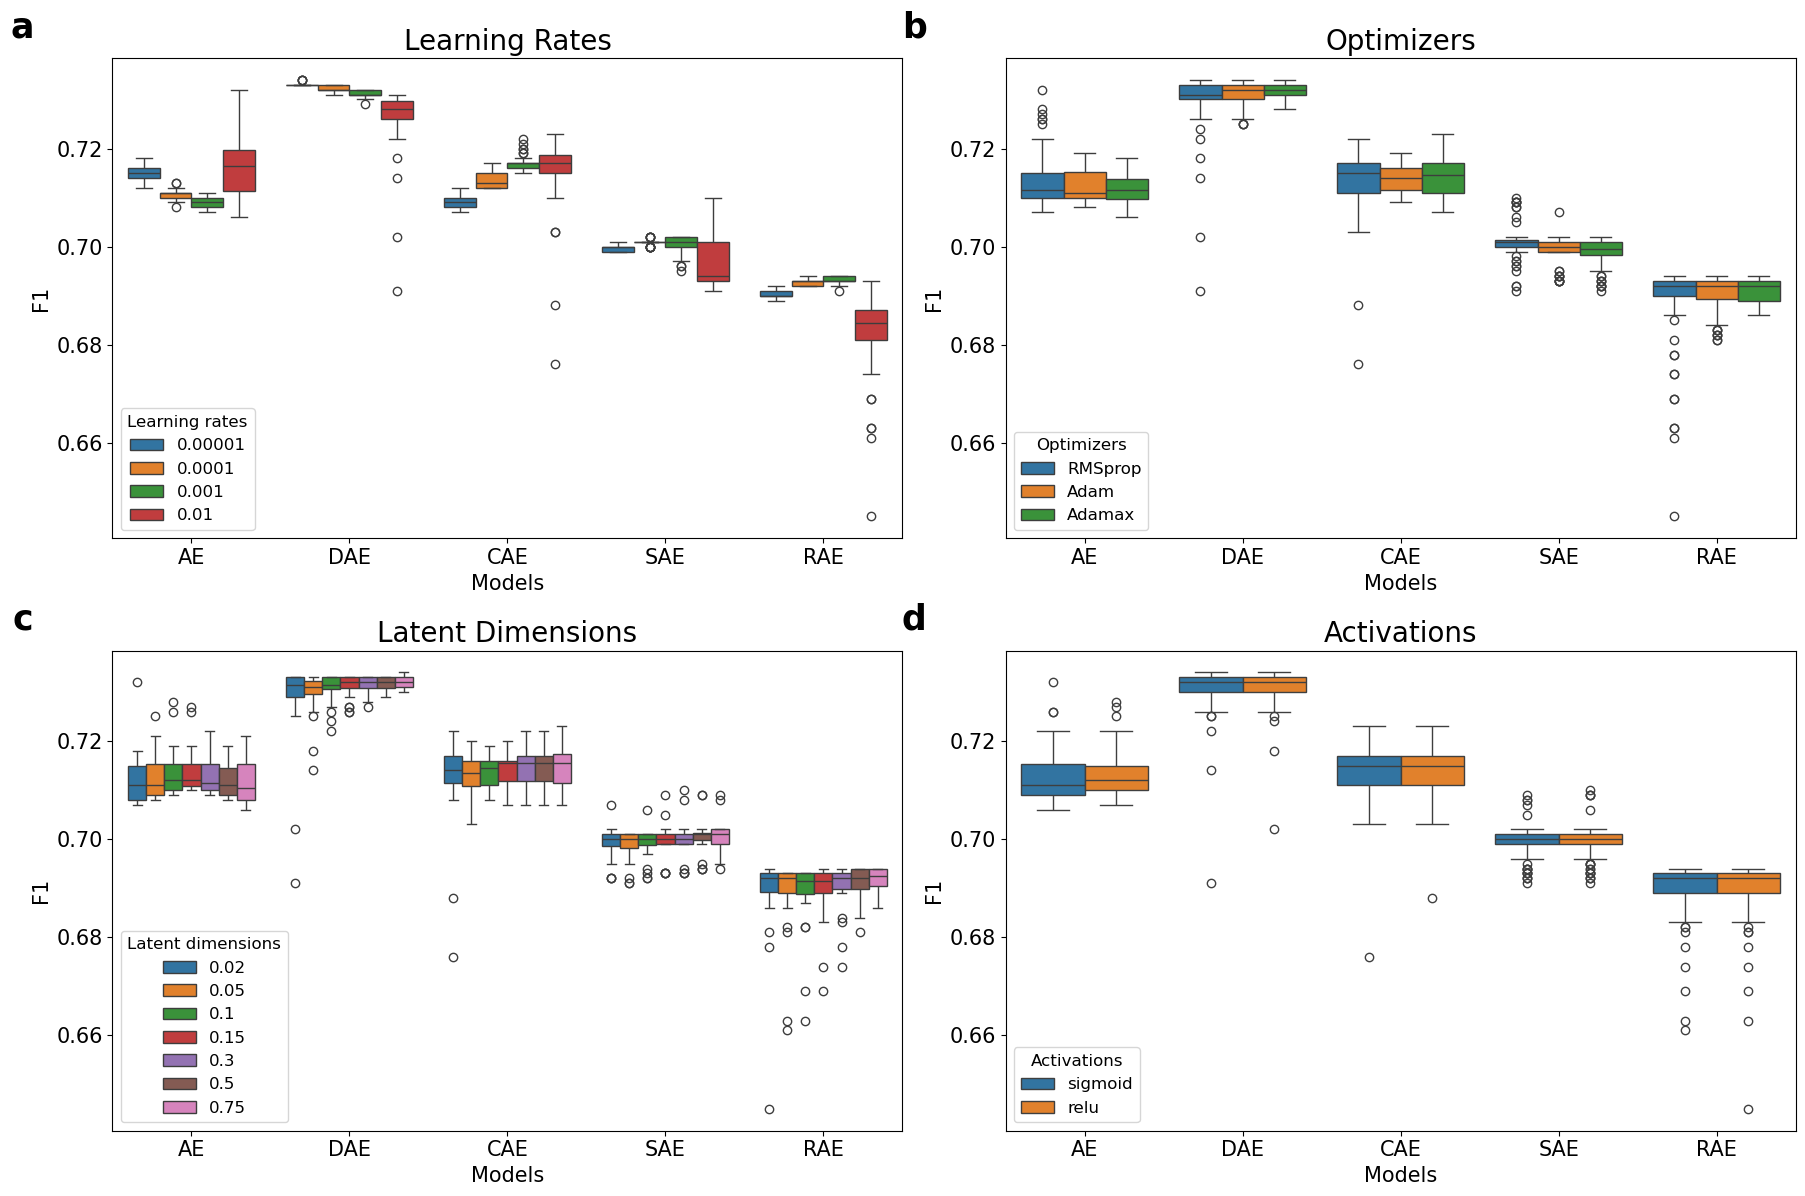

In [86]:
process_and_plot_config_perf(results_dict, "AUROC")

# Metric Learning without Latent Control

In [ ]:
import os
import fnmatch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score
from metric_learn import LMNN, NCA, MLKR

In [ ]:
def load_npy_files_from_folder(folder_path, lat_control = False):

    npy_files = []  
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if lat_control:
                if fnmatch.fnmatch(file, '*_lat.npy'):
                    npy_files.append(file)
            else:  
                if fnmatch.fnmatch(file, '*.npy') and not fnmatch.fnmatch(file, '*_lat.npy'):
                    npy_files.append(file)

    # Sort the files alphabetically
    npy_files.sort()
    print(npy_files)

    # Load each .npy file
    data_list = []
    for file_name in npy_files:
        file_path = os.path.join(folder_path, file_name)
        data = np.load(file_path)
        data_list.append(data)

    return data_list

In [ ]:
base_path = "..."
transformation_list = load_npy_files_from_folder(base_path)

In [ ]:
len(transformation_list)

In [ ]:
n_CV = 5

In [ ]:
# raw data
Raw_trans_test = transformation_list[10 * n_CV:11 * n_CV]
Raw_trans_train = transformation_list[11 * n_CV:12 * n_CV]

In [ ]:
# k = 5 best AE model transformed data
BAE_trans_test = transformation_list[:1 * n_CV]
BAE_trans_train = transformation_list[1 * n_CV:2 * n_CV]
CAE_trans_test = transformation_list[2 * n_CV:3 * n_CV]
CAE_trans_train = transformation_list[3 * n_CV:4 * n_CV]
DAE_trans_test = transformation_list[4 * n_CV:5 * n_CV]
DAE_trans_train = transformation_list[5 * n_CV:6 * n_CV]
RAE_trans_test = transformation_list[6 * n_CV:7 * n_CV]
RAE_trans_train = transformation_list[7 * n_CV:8 * n_CV]
SAE_trans_test = transformation_list[8 * n_CV:9 * n_CV]
SAE_trans_train = transformation_list[9 * n_CV:10 * n_CV]

In [ ]:
def evaluate_metric_learning_cv(AE_trans_train, AE_trans_test, n_neighbors):
    
    Euc_perf_scores = []
    LMNN_perf_scores = [] 
    NCA_perf_scores = [] 
    MLKR_perf_scores = [] 
    
    for i in tqdm(range(n_CV)):
        train_data = AE_trans_train[i]
        test_data = AE_trans_test[i]
        
        Euc_perf_scores.append(evaluate_metric_learning(None, 'Euc', train_data, test_data, n_neighbors))
        LMNN_perf_scores.append(evaluate_metric_learning(LMNN, 'LMNN', train_data, test_data, n_neighbors))
        NCA_perf_scores.append(evaluate_metric_learning(NCA, 'NCA', train_data, test_data, n_neighbors))
        MLKR_perf_scores.append(evaluate_metric_learning(MLKR, 'MLKR', train_data, test_data, n_neighbors))
    
    results_dict = {
        'Euc': {'mean': np.mean(Euc_perf_scores), 'std': np.std(Euc_perf_scores)},
        'LMNN': {'mean': np.mean(LMNN_perf_scores), 'std': np.std(LMNN_perf_scores)},
        'NCA': {'mean': np.mean(NCA_perf_scores), 'std': np.std(NCA_perf_scores)},
        'MLKR': {'mean': np.mean(MLKR_perf_scores), 'std': np.std(MLKR_perf_scores)},
    }
    return results_dict

In [ ]:
def evaluate_metric_learning(model_class, model_name, train_data, test_data, n_neighbors):
    X_train, y_train = train_data[:, :-1], train_data[:, -1]
    X_test, y_test = test_data[:, :-1], test_data[:, -1]
    
    if model_class is not None:
        if model_name == 'NCA':
            model = model_class(max_iter=5000)
        elif model_name == 'LMNN':
            model = model_class(n_neighbors=n_neighbors)
        else:
            model = model_class()
            
        model.fit(X_train, y_train)
    
    if model_class is None:
        metric = 'euclidean'
    else:
        metric = model.get_metric()
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_prob = knn.predict_proba(X_test)[:, 1]
    auprc = average_precision_score(y_test, y_prob)
    return auprc

Main Run

In [ ]:
# evaluate at k = 5
n_neighbors = 5
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Raw_metr_lear_results = evaluate_metric_learning_cv(Raw_trans_train, Raw_trans_test, n_neighbors)
    with open(result_folder + 'Metric_learning/Raw_metr_lear_results.pkl', 'wb') as file:
        pickle.dump(Raw_metr_lear_results, file)
    
    BAE_metr_lear_results = evaluate_metric_learning_cv(BAE_trans_train, BAE_trans_test, n_neighbors)
    with open(result_folder + 'Metric_learning/BAE_metr_lear_results.pkl', 'wb') as file:
        pickle.dump(BAE_metr_lear_results, file)
    
    DAE_metr_lear_results = evaluate_metric_learning_cv(DAE_trans_train, DAE_trans_test, n_neighbors)
    with open(result_folder + 'Metric_learning/DAE_metr_lear_results.pkl', 'wb') as file:
        pickle.dump(DAE_metr_lear_results, file)
    
    CAE_metr_lear_results = evaluate_metric_learning_cv(CAE_trans_train, CAE_trans_test, n_neighbors)
    with open(result_folder + 'Metric_learning/CAE_metr_lear_results.pkl', 'wb') as file:
        pickle.dump(CAE_metr_lear_results, file)
    
    SAE_metr_lear_results = evaluate_metric_learning_cv(SAE_trans_train, SAE_trans_test, n_neighbors)
    with open(result_folder + 'Metric_learning/SAE_metr_lear_results.pkl', 'wb') as file:
        pickle.dump(SAE_metr_lear_results, file)
    
    RAE_metr_lear_results = evaluate_metric_learning_cv(RAE_trans_train, RAE_trans_test, n_neighbors)
    with open(result_folder + 'Metric_learning/RAE_metr_lear_results.pkl', 'wb') as file:
        pickle.dump(RAE_metr_lear_results, file)

In [ ]:
metric_learn_names = ['Euc', 'LMNN', 'NCA', 'MLKR']
metr_lear_k_5_df = pd.DataFrame(0.0, index = ['Raw'] + model_names, columns = metric_learn_names)

In [ ]:
# Reading the dictionary from the file
with open(result_folder + 'Metric_learning/Raw_metr_lear_results.pkl', 'rb') as file:
    Raw_metr_lear_results = pickle.load(file)
with open(result_folder + 'Metric_learning/BAE_metr_lear_results.pkl', 'rb') as file:
    BAE_metr_lear_results = pickle.load(file)
with open(result_folder + 'Metric_learning/DAE_metr_lear_results.pkl', 'rb') as file:
    DAE_metr_lear_results = pickle.load(file)
with open(result_folder + 'Metric_learning/CAE_metr_lear_results.pkl', 'rb') as file:
    CAE_metr_lear_results = pickle.load(file)
with open(result_folder + 'Metric_learning/SAE_metr_lear_results.pkl', 'rb') as file:
    SAE_metr_lear_results = pickle.load(file)
with open(result_folder + 'Metric_learning/RAE_metr_lear_results.pkl', 'rb') as file:
    RAE_metr_lear_results = pickle.load(file)

In [ ]:
metr_lear_results_dict = {
    'Raw': Raw_metr_lear_results,
    'AE': BAE_metr_lear_results,
    'DAE': DAE_metr_lear_results,
    'CAE': CAE_metr_lear_results,
    'SAE': SAE_metr_lear_results,
    'RAE': RAE_metr_lear_results,
}

In [ ]:
def assign_metr_lear_performance(metr_lear_df, k, metr_lear_results_dict):
    metr_lear_df = metr_lear_df.astype('object')
    raw_and_model_names = ['Raw'] + model_names
    for model_name in raw_and_model_names:
        for metr_lear in metric_learn_names:
            perf_mean = metr_lear_results_dict[model_name][metr_lear]['mean']
            perf_std = metr_lear_results_dict[model_name][metr_lear]['std']
            metr_lear_df.loc[model_name, metr_lear] = "{:.3f} ({:.3f})".format(perf_mean, perf_std)
    return metr_lear_df

In [ ]:
metr_lear_k_5_df = assign_metr_lear_performance(metr_lear_k_5_df, 5, metr_lear_results_dict)

In [ ]:
metr_lear_k_5_df

In [ ]:
metr_lear_k_5_df.to_csv(result_folder + 'Metric_learning/KUMC_metric_learn.csv', index = True)

# Metric Learning with Latent Control

In [ ]:
transformation_list_lat = load_npy_files_from_folder(base_path, True)

In [ ]:
# k = 5 best AE model transformed data
BAE_trans_test_lat = transformation_list_lat[:1 * n_CV]
BAE_trans_train_lat = transformation_list_lat[1 * n_CV:2 * n_CV]
CAE_trans_test_lat = transformation_list_lat[2 * n_CV:3 * n_CV]
CAE_trans_train_lat = transformation_list_lat[3 * n_CV:4 * n_CV]
DAE_trans_test_lat = transformation_list_lat[4 * n_CV:5 * n_CV]
DAE_trans_train_lat = transformation_list_lat[5 * n_CV:6 * n_CV]
RAE_trans_test_lat = transformation_list_lat[6 * n_CV:7 * n_CV]
RAE_trans_train_lat = transformation_list_lat[7 * n_CV:8 * n_CV]
SAE_trans_test_lat = transformation_list_lat[8 * n_CV:9 * n_CV]
SAE_trans_train_lat = transformation_list_lat[9 * n_CV:10 * n_CV]

Main run

In [ ]:
# evaluate at k = 5
n_neighbors = 5
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # we do not need to run for raw again
    
    BAE_metr_lear_results_lat = evaluate_metric_learning_cv(BAE_trans_train_lat, BAE_trans_test_lat, n_neighbors)
    with open(result_folder + 'Metric_learning/BAE_metr_lear_results_lat.pkl', 'wb') as file:
        pickle.dump(BAE_metr_lear_results_lat, file)
    
    DAE_metr_lear_results_lat = evaluate_metric_learning_cv(DAE_trans_train_lat, DAE_trans_test_lat, n_neighbors)
    with open(result_folder + 'Metric_learning/DAE_metr_lear_results_lat.pkl', 'wb') as file:
        pickle.dump(DAE_metr_lear_results_lat, file)
    
    CAE_metr_lear_results_lat = evaluate_metric_learning_cv(CAE_trans_train_lat, CAE_trans_test_lat, n_neighbors)
    with open(result_folder + 'Metric_learning/CAE_metr_lear_results_lat.pkl', 'wb') as file:
        pickle.dump(CAE_metr_lear_results_lat, file)
    
    SAE_metr_lear_results_lat = evaluate_metric_learning_cv(SAE_trans_train_lat, SAE_trans_test_lat, n_neighbors)
    with open(result_folder + 'Metric_learning/SAE_metr_lear_results_lat.pkl', 'wb') as file:
        pickle.dump(SAE_metr_lear_results_lat, file)
    
    RAE_metr_lear_results_lat = evaluate_metric_learning_cv(RAE_trans_train_lat, RAE_trans_test_lat, n_neighbors)
    with open(result_folder + 'Metric_learning/RAE_metr_lear_results_lat.pkl', 'wb') as file:
        pickle.dump(RAE_metr_lear_results_lat, file)

In [ ]:
metric_learn_names = ['Euc', 'LMNN', 'NCA', 'MLKR']
metr_lear_k_5_df_lat = pd.DataFrame(0.0, index = ['Raw'] + model_names, columns = metric_learn_names)

In [ ]:
# Reading the dictionary from the file
with open(result_folder + 'Metric_learning/Raw_metr_lear_results.pkl', 'rb') as file:
    Raw_metr_lear_results_lat = pickle.load(file)
with open(result_folder + 'Metric_learning/BAE_metr_lear_results_lat.pkl', 'rb') as file:
    BAE_metr_lear_results_lat = pickle.load(file)
with open(result_folder + 'Metric_learning/DAE_metr_lear_results_lat.pkl', 'rb') as file:
    DAE_metr_lear_results_lat = pickle.load(file)
with open(result_folder + 'Metric_learning/CAE_metr_lear_results_lat.pkl', 'rb') as file:
    CAE_metr_lear_results_lat = pickle.load(file)
with open(result_folder + 'Metric_learning/SAE_metr_lear_results_lat.pkl', 'rb') as file:
    SAE_metr_lear_results_lat = pickle.load(file)
with open(result_folder + 'Metric_learning/RAE_metr_lear_results_lat.pkl', 'rb') as file:
    RAE_metr_lear_results_lat = pickle.load(file)

In [ ]:
metr_lear_results_dict_lat = {
    'Raw': Raw_metr_lear_results_lat,
    'AE': BAE_metr_lear_results_lat,
    'DAE': DAE_metr_lear_results_lat,
    'CAE': CAE_metr_lear_results_lat,
    'SAE': SAE_metr_lear_results_lat,
    'RAE': RAE_metr_lear_results_lat,
}

In [ ]:
metr_lear_k_5_df_lat = assign_metr_lear_performance(metr_lear_k_5_df_lat, 5, metr_lear_results_dict_lat)

In [ ]:
metr_lear_k_5_df_lat

In [ ]:
metr_lear_k_5_df_lat.to_csv(result_folder + 'Metric_learning/KUMC_metric_learn_lat.csv', index = True)